In [1]:
from torchlake.common.utils.plot import plot_grids
from torchlake.common.utils.image import load_image

from torchlake.object_detection.controller.trainer import Trainer
from torchlake.object_detection.controller.evaluator import Evaluator
from torchlake.object_detection.controller.predictor import Predictor
from torchlake.object_detection.constants.enums import NetworkStage, NetworkType
from torchlake.object_detection.utils.plot import draw_pred

In [2]:
# import time
import pandas as pd
import torchinfo
import matplotlib.pyplot as plt
from glob import glob
import random
# from tqdm import tqdm
from pathlib import Path

# setting

In [3]:
configs_path = Path("../torchlake/object_detection/configs/yolov1")
config_path = configs_path.joinpath("resnet34.yml").as_posix()

In [12]:
artifact_path = Path('../../artifacts/yolov1')

# train

In [29]:
trainer = Trainer(config_path, "VOC", NetworkType.DETECTOR.value, NetworkStage.SCRATCH.value)

In [30]:
trainer.train('test-34')

Epoch 1/30


100%|██████████| 1035/1035 [05:02<00:00,  3.42it/s]


1.0791482468197608
Epoch 2/30


100%|██████████| 1035/1035 [04:44<00:00,  3.64it/s]


0.4814280934956389
Epoch 3/30


100%|██████████| 1035/1035 [04:44<00:00,  3.64it/s]


0.4031705275222071
Epoch 4/30


100%|██████████| 1035/1035 [04:44<00:00,  3.64it/s]


0.3633670447910021
Epoch 5/30


100%|██████████| 1035/1035 [04:44<00:00,  3.64it/s]


0.336149213573492
Epoch 6/30


100%|██████████| 1035/1035 [04:43<00:00,  3.66it/s]


0.3031565148076596
Epoch 7/30


100%|██████████| 1035/1035 [04:56<00:00,  3.49it/s]


0.400314530867636
Epoch 8/30


100%|██████████| 1035/1035 [05:06<00:00,  3.38it/s]


0.2949499426475213
Epoch 9/30


100%|██████████| 1035/1035 [04:56<00:00,  3.49it/s]


0.26869187149913076
Epoch 10/30


100%|██████████| 1035/1035 [04:43<00:00,  3.64it/s]


0.25861230829850934
Epoch 11/30


100%|██████████| 1035/1035 [04:43<00:00,  3.65it/s]


0.27170404925619207
Epoch 12/30


100%|██████████| 1035/1035 [04:43<00:00,  3.66it/s]


0.23673764579382975
Epoch 13/30


100%|██████████| 1035/1035 [04:41<00:00,  3.68it/s]


0.24218121925283936
Epoch 14/30


100%|██████████| 1035/1035 [04:41<00:00,  3.68it/s]


0.21841946871761367
Epoch 15/30


100%|██████████| 1035/1035 [04:37<00:00,  3.73it/s]


0.2062526371650311
Epoch 16/30


100%|██████████| 1035/1035 [04:37<00:00,  3.73it/s]


0.2006716465677756
Epoch 17/30


100%|██████████| 1035/1035 [04:37<00:00,  3.73it/s]


0.1902546847300921
Epoch 18/30


100%|██████████| 1035/1035 [04:37<00:00,  3.74it/s]


0.182097986287404
Epoch 19/30


100%|██████████| 1035/1035 [04:36<00:00,  3.74it/s]


0.17451113583090716
Epoch 20/30


100%|██████████| 1035/1035 [04:37<00:00,  3.74it/s]


0.17212491558077947
Epoch 21/30


100%|██████████| 1035/1035 [04:37<00:00,  3.73it/s]


0.16438380001347688
Epoch 22/30


100%|██████████| 1035/1035 [04:37<00:00,  3.73it/s]


0.1609364545069449
Epoch 23/30


100%|██████████| 1035/1035 [04:37<00:00,  3.73it/s]


0.15831207312901469
Epoch 24/30


100%|██████████| 1035/1035 [04:38<00:00,  3.72it/s]


0.15434908769287867
Epoch 25/30


100%|██████████| 1035/1035 [04:37<00:00,  3.73it/s]


0.15541776142684466
Epoch 26/30


100%|██████████| 1035/1035 [04:37<00:00,  3.73it/s]


0.36205894144256556
Epoch 27/30


100%|██████████| 1035/1035 [04:37<00:00,  3.73it/s]


0.3453263318774189
Epoch 28/30


100%|██████████| 1035/1035 [04:37<00:00,  3.73it/s]


0.21284010335978593
Epoch 29/30


100%|██████████| 1035/1035 [04:36<00:00,  3.74it/s]


0.1757470113396623
Epoch 30/30


100%|██████████| 1035/1035 [04:37<00:00,  3.73it/s]


0.15387594242498137


In [31]:
torchinfo.summary(trainer.model)

Layer (type:depth-idx)                        Param #
Yolov1Resnet                                  --
├─ResNet: 1-1                                 --
│    └─Conv2d: 2-1                            9,408
│    └─BatchNorm2d: 2-2                       128
│    └─ReLU: 2-3                              --
│    └─MaxPool2d: 2-4                         --
│    └─Sequential: 2-5                        --
│    │    └─BasicBlock: 3-1                   73,984
│    │    └─BasicBlock: 3-2                   73,984
│    │    └─BasicBlock: 3-3                   73,984
│    └─Sequential: 2-6                        --
│    │    └─BasicBlock: 3-4                   230,144
│    │    └─BasicBlock: 3-5                   295,424
│    │    └─BasicBlock: 3-6                   295,424
│    │    └─BasicBlock: 3-7                   295,424
│    └─Sequential: 2-7                        --
│    │    └─BasicBlock: 3-8                   919,040
│    │    └─BasicBlock: 3-9                   1,180,672
│    │    └─Basi

# evaluate

In [17]:
evaluator = Evaluator(
    config_path,
    "VOC",
    NetworkType.DETECTOR.value,
)

In [23]:
evaluator.evaluate(
    map(str, artifact_path.joinpath(evaluator.cfg.MODEL.BACKBONE).glob('*.pth'))[-1],
    save_dir=artifact_path.as_posix(),
)

..\..\artifacts\yolov1\resnet34\yolov1.resnet34.10.pth


100%|██████████| 310/310 [01:49<00:00,  2.83it/s]


..\..\artifacts\yolov1\resnet34\yolov1.resnet34.20.pth


100%|██████████| 310/310 [02:00<00:00,  2.58it/s]


..\..\artifacts\yolov1\resnet34\yolov1.resnet34.30.pth


100%|██████████| 310/310 [01:56<00:00,  2.65it/s]


                                                    aeroplane   bicycle  \
..\..\artifacts\yolov1\resnet34\yolov1.resnet34...   0.285928  0.243080   
..\..\artifacts\yolov1\resnet34\yolov1.resnet34...   0.334452  0.264394   
..\..\artifacts\yolov1\resnet34\yolov1.resnet34...   0.343156  0.264758   

                                                        bird      boat  \
..\..\artifacts\yolov1\resnet34\yolov1.resnet34...  0.151106  0.151515   
..\..\artifacts\yolov1\resnet34\yolov1.resnet34...  0.235090  0.160079   
..\..\artifacts\yolov1\resnet34\yolov1.resnet34...  0.237434  0.211670   

                                                      bottle       bus  \
..\..\artifacts\yolov1\resnet34\yolov1.resnet34...  0.090909  0.322694   
..\..\artifacts\yolov1\resnet34\yolov1.resnet34...  0.090909  0.432416   
..\..\artifacts\yolov1\resnet34\yolov1.resnet34...  0.090909  0.425696   

                                                         car       cat  \
..\..\artifacts\yolov1\resnet34

# predict

In [4]:
predictor = Predictor(
    config_path,
    "VOC",
    NetworkType.DETECTOR.value,
)

In [5]:
humans_img = "C://Users/User/Desktop/1672998424399.jpg"
human_img = "D://W/hmm/+-x-.jpg"
obj_img = "D://research/pytorch-implementations/data/VOCdevkit/VOC2012/JPEGImages/2007_000033.jpg"

predictor.predict_image_file(
    artifact_path.joinpath("resnet34/yolov1.resnet34.30.pth").as_posix(),
    [humans_img, human_img, obj_img],
    save_dir=artifact_path.as_posix(),
)

person: 0.38
person: 0.46
C://Users/User/Desktop/1672998424399.jpg 2
person: 0.82
D://W/hmm/+-x-.jpg 1
aeroplane: 0.70
D://research/pytorch-implementations/data/VOCdevkit/VOC2012/JPEGImages/2007_000033.jpg 1


# further evaluation

In [6]:
predictor = Predictor(
    config_path,
    "VOC",
    NetworkType.DETECTOR.value,
)

bird: 0.37
person: 0.34
person: 0.31
person: 0.53
dog: 0.31
motorbike: 0.72
motorbike: 0.86
dog: 0.69
dog: 0.71
person: 0.31
person: 0.40


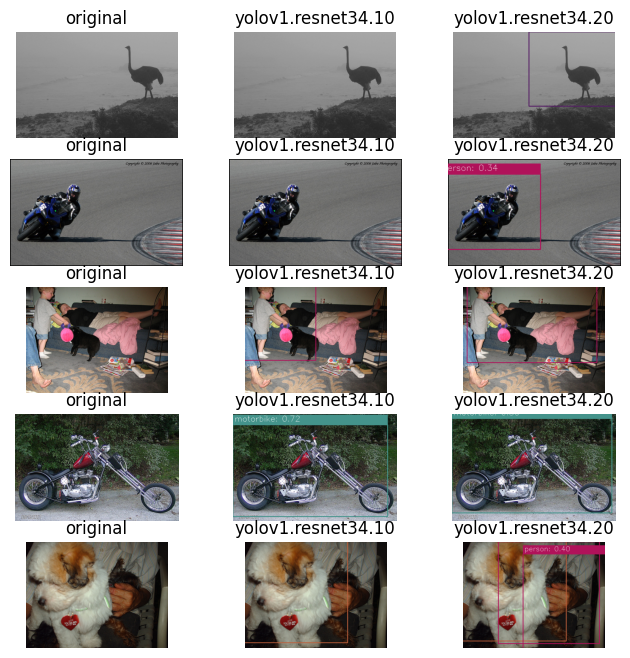

In [11]:
transform = predictor.prepare_inference()

image_paths = glob('D://research/pytorch-implementations/data/VOCdevkit/VOC2012/JPEGImages/*')
random_selected_image_paths = random.choices(image_paths, k=5)

weight_paths = ['./artifacts/yolov1/resnet34/yolov1.resnet34.10.pth', './artifacts/yolov1/resnet34/yolov1.resnet34.20.pth']

titles = []
predictions = []
for image_path in random_selected_image_paths:
    img = load_image(image_path, is_numpy=True)
    predictions.append(img)
    titles.append('original')
    for weight_path in weight_paths:
        copied_img = img.copy()
        
        predictor.load_weight(weight_path)
        prediction = predictor.detect_single_image(img, transform)
        draw_pred(copied_img, prediction, predictor.class_names, class_color=predictor.palette)
        predictions.append(copied_img)
        titles.append(Path(weight_path).stem)

plot_grids(predictions, titles, 5, 1+len(weight_paths))

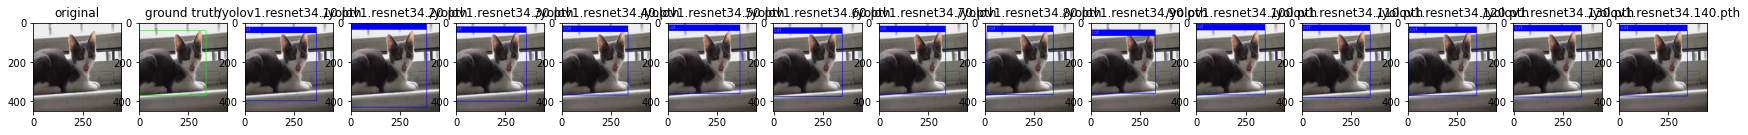

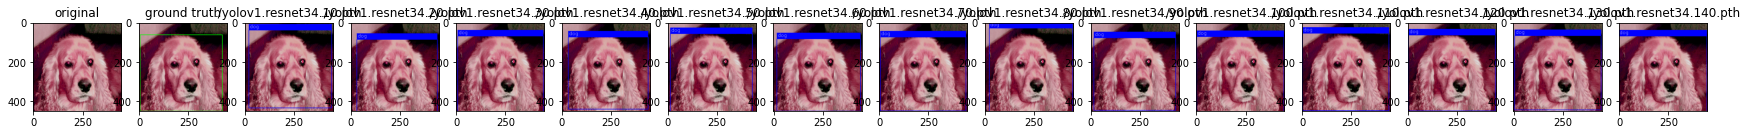

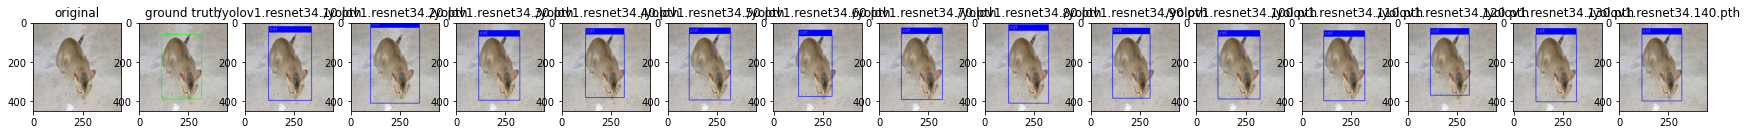

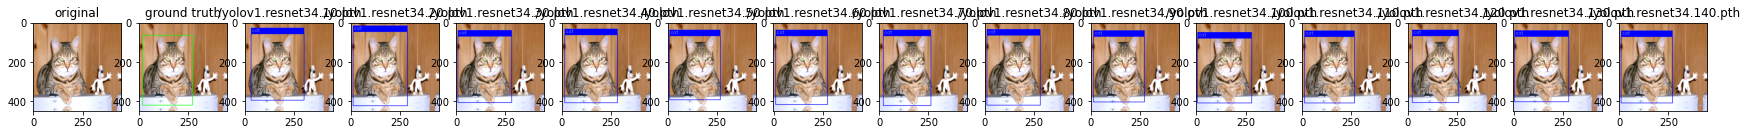

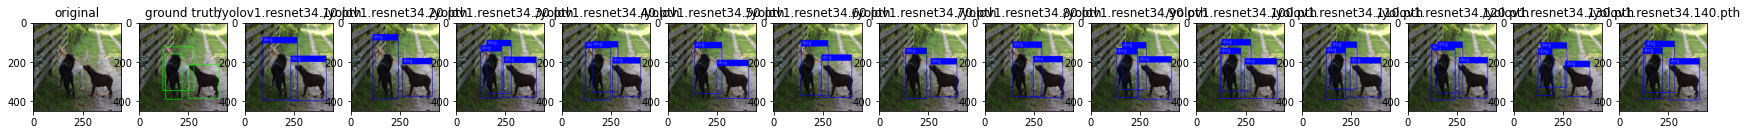

In [34]:
lots_of_prediction_and_lots_of_model(np.random.randint(low=0,high=len(trainset),size=5),
                                     )

# all epoch evaluation

In [15]:
evaluator = Evaluator(
    config_path,
    "VOC",
    NetworkType.DETECTOR.value,
)

In [16]:
evaluator.evaluate(
    map(str, artifact_path.joinpath(evaluator.cfg.MODEL.BACKBONE).glob('*.pth'))[-1],
    verbose=False,
    save_dir=artifact_path.as_posix(),
)

./artifacts/yolov1/resnet18/yolov1.resnet18.10.pth


100%|██████████| 155/155 [01:35<00:00,  1.62it/s]

                                                    aeroplane   bicycle  \
./artifacts/yolov1/resnet18/yolov1.resnet18.10.pth    0.23071  0.247278   

                                                        bird      boat  \
./artifacts/yolov1/resnet18/yolov1.resnet18.10.pth  0.143844  0.137221   

                                                      bottle       bus  \
./artifacts/yolov1/resnet18/yolov1.resnet18.10.pth  0.090909  0.252544   

                                                         car       cat  \
./artifacts/yolov1/resnet18/yolov1.resnet18.10.pth  0.267251  0.408883   

                                                       chair       cow  ...  \
./artifacts/yolov1/resnet18/yolov1.resnet18.10.pth  0.090909  0.148325  ...   

                                                         dog    horse  \
./artifacts/yolov1/resnet18/yolov1.resnet18.10.pth  0.312561  0.27984   

                                                    motorbike    person  \
./artifacts/yolov1/re

In [24]:
result_table = pd.read_csv(artifact_path.joinpath('eval.csv'))

In [25]:
result_table

,Unnamed: 0,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,...,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor,all
0,..\..\artifacts\yolov1\resnet34\yolov1.resnet3...,0.285928,0.243080,0.151106,0.151515,0.090909,0.322694,0.268679,0.421576,0.090909,...,0.264929,0.304034,0.250271,0.141176,0.090909,0.090909,0.238564,0.327961,0.090909,0.214908
1,..\..\artifacts\yolov1\resnet34\yolov1.resnet3...,0.334452,0.264394,0.235090,0.160079,0.090909,0.432416,0.271636,0.519197,0.090909,...,0.406530,0.402499,0.334981,0.166877,0.090909,0.163636,0.303895,0.414163,0.132353,0.264781
2,..\..\artifacts\yolov1\resnet34\yolov1.resnet3...,0.343156,0.264758,0.237434,0.211670,0.090909,0.425696,0.271030,0.531502,0.090909,...,0.423003,0.411214,0.302629,0.171145,0.090909,0.174825,0.285663,0.403578,0.131752,0.273925


<Axes: >

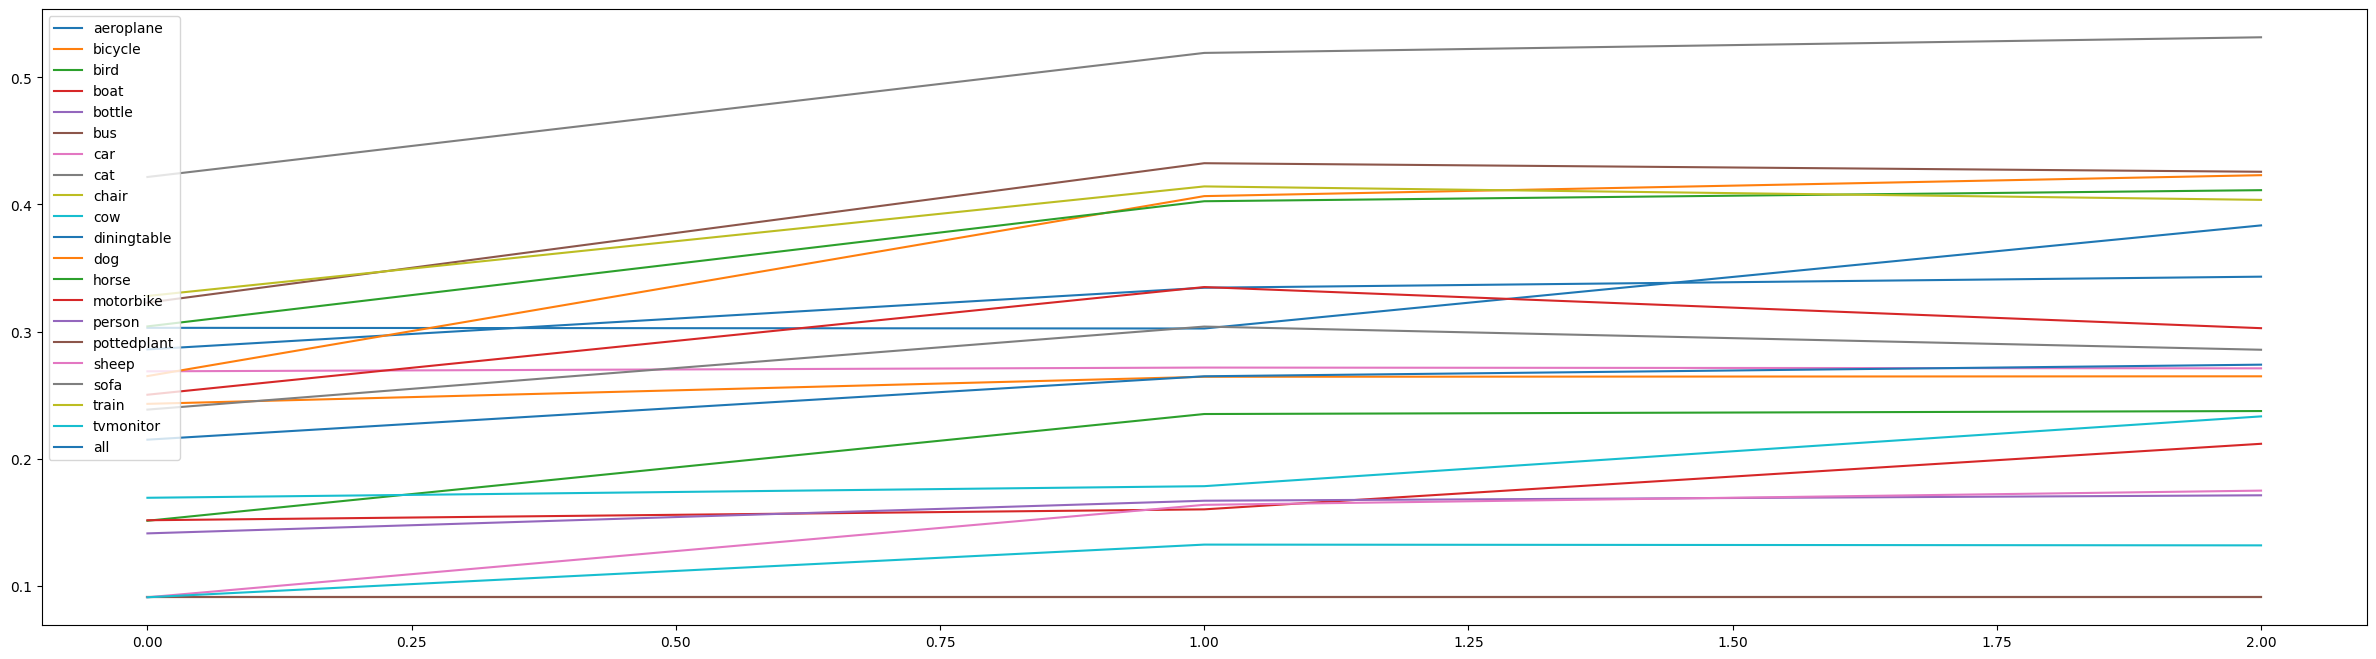

In [37]:
result_table.plot(figsize=(30,8))


<AxesSubplot:>

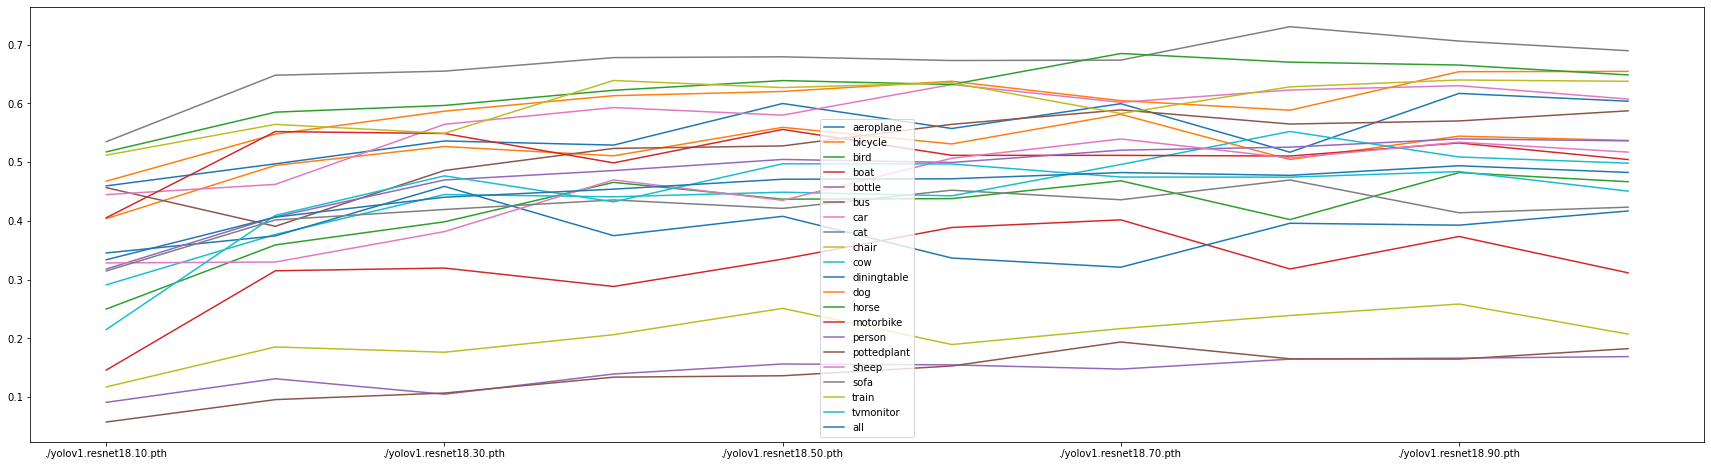

In [47]:
result_table.plot(figsize=(30,8))

<AxesSubplot:title={'center':'validation mAP on VOC 2007 test set'}>

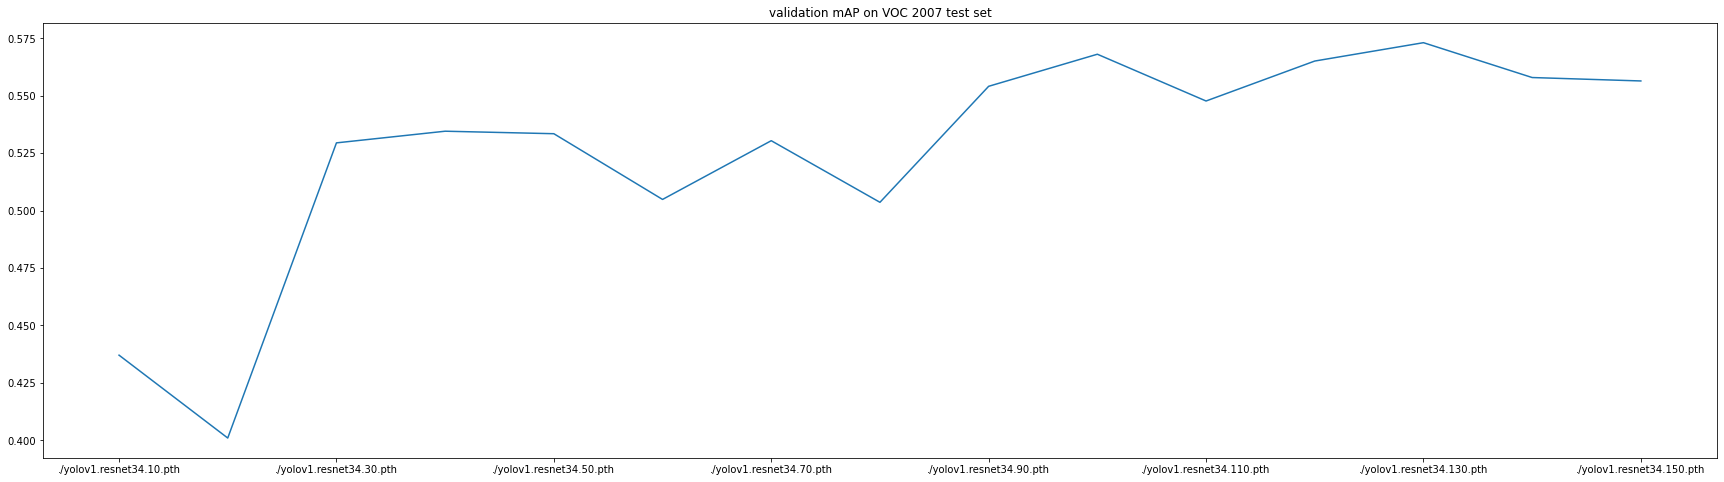

In [42]:
result_table['all'].plot(figsize=(30,8),title="validation mAP on VOC 2007 test set")

# debug

In [43]:
interest_cls = 'aeroplane'
Iamnotsure = pd.DataFrame({
    'iou': torch.cat([a for a, b, c in debug_map[interest_cls] if a is not None],0).numpy(),
    'prob': torch.cat([b for a, b, c in debug_map[interest_cls] if b is not None],0).numpy(),
    'gt': sum(c for a, b, c in debug_map[interest_cls])
}).sort_values('prob',ascending=False)
Iamnotsure['TP'] = Iamnotsure['iou'].gt(0.5).cumsum()
Iamnotsure['precision'] = Iamnotsure['TP']/np.arange(1,len(Iamnotsure)+1)
Iamnotsure['recall'] = Iamnotsure['TP']/Iamnotsure['gt']
Iamnotsure

,iou,prob,gt,TP,precision,recall
71,0.884566,0.890917,265.0,1,1.000000,0.003774
100,0.955297,0.890582,265.0,2,1.000000,0.007547
142,0.851079,0.879476,265.0,3,1.000000,0.011321
134,0.940841,0.871596,265.0,4,1.000000,0.015094
200,0.811990,0.857263,265.0,5,1.000000,0.018868
...,...,...,...,...,...,...
101,0.518033,0.335952,265.0,190,0.867580,0.716981
58,0.000000,0.321791,265.0,190,0.863636,0.716981
164,0.577316,0.320824,265.0,191,0.864253,0.720755
28,0.000000,0.319813,265.0,191,0.860360,0.720755


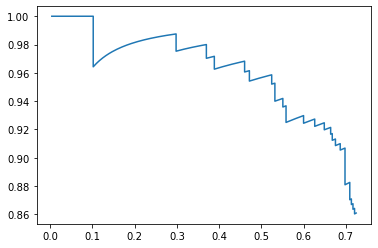

In [44]:
# plt.ylim(0,1.3)
plt.plot(Iamnotsure['recall'], Iamnotsure['precision'])

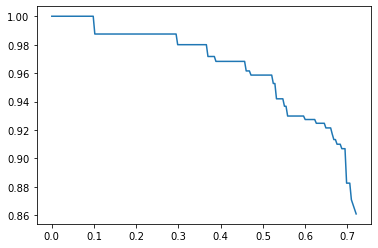

In [45]:
a,b = all_pr_curve(eval_table[interest_cls]['precision'],eval_table[interest_cls]['recall'])
plt.plot(b, a)

In [11]:
r18 = pd.read_csv('Final.1e-4/eval.csv',index_col=0)
r34 = pd.read_csv('Final.1e-4.34/eval.csv',index_col=0)

In [14]:
pd.concat([r18,r34]).loc[['./yolov1.resnet18.150.pth','./yolov1.resnet34.130.pth']].transpose()

,./yolov1.resnet18.150.pth,./yolov1.resnet34.130.pth
aeroplane,0.659695,0.699073
bicycle,0.601857,0.635265
bird,0.528688,0.610817
boat,0.457822,0.517191
bottle,0.199932,0.248924
bus,0.630690,0.716136
car,0.658628,0.670062
cat,0.751293,0.761671
chair,0.216588,0.309187
cow,0.550103,0.604650


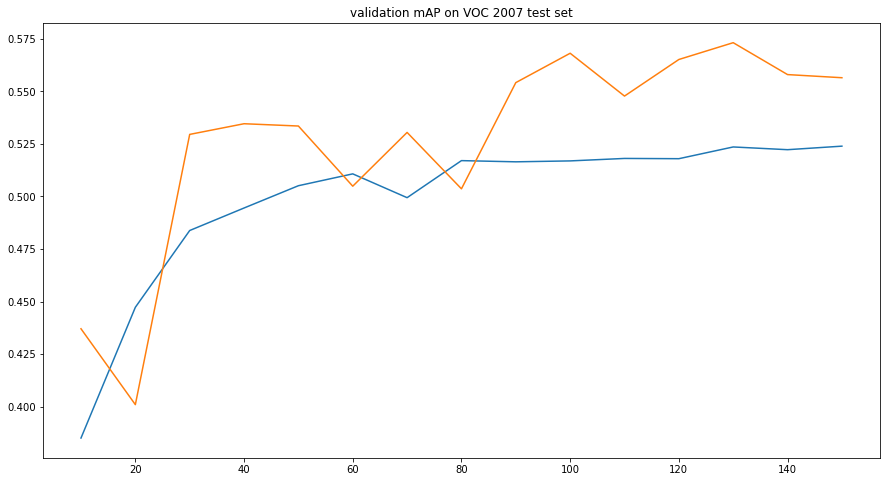

In [23]:
plt.figure(figsize=(15,8))
plt.title("validation mAP on VOC 2007 test set")
plt.plot(range(10,160,10), r18['all'])
plt.plot(range(10,160,10), r34['all'])